## Linear classifier vs. Logistic classifier

This exercise explores how linear regression can be used for binary classification. We will also compare the logistic regression approach for the same problem.

Let's start by simulating data we want to fit. The data has two class 0 and 1. And the task is to classify them.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import pandas as pd
import seaborn as sns

In [987]:
x1_array = np.linspace(0,10,10000)
x1_array = x1_array + np.random.normal(0,1,10000)

x2_array = np.linspace(0,10,10000)
x2_array = x2_array + np.random.normal(0,1,10000)

y_array = np.where(x1_array + x2_array + np.random.normal(0,4,10000) < 8, 
                   int(0),int(1))
color_map = np.where(y_array == 0,'red','blue')

Text(0.5, 1.0, 'dataset')

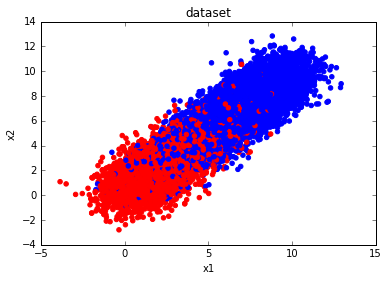

In [988]:
plt.scatter(x1_array,x2_array,color = color_map)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('dataset')

To create linear classifier, first we perform linear regression. Then we set a threshold for deciding the class boundary. Note that the regressed value (y) is unrestricted, that is to say it can range from minus infinity to infinity. The point we shall return to discuss. 

To perform linear regression, we can specify cost function to be least-square, and use linear albegra trick that can give us a closed form solution.

But for this exercise we will use package statsmodels to do the work.

In [989]:
import statsmodels.api as sm

In [990]:
XY_dataframe = pd.DataFrame({'x1':x1_array,'x2':x2_array,'y':y_array})
XY_dataframe.head()

,x1,x2,y
0,0.042882,-0.076804,0
1,-0.123232,-0.648058,0
2,-1.595060,-1.146526,0
3,-1.580975,1.083715,0
4,1.414462,-0.704650,0


In [991]:
X_data = sm.add_constant(XY_dataframe[['x1','x2']])
model = sm.OLS(y_array,X_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     5059.
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:36:05   Log-Likelihood:                -3567.2
No. Observations:               10000   AIC:                             7140.
Df Residuals:                    9997   BIC:                             7162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0145      0.007      2.143      0.032       0.001       0.028
x1             0.0588      0.003     23.416      0.000       0.054       0.064
x2             0.0578      0.003     22.913      0.000       0.053       0.063
==============================================================================
Omnibus:                       38.151   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.349
Skew:                           0.112   Prob(JB):                     2.11e-08
Kurtosis:                       2.814   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Then we will set threshold for the linear classifier, that is to say, when we see the y value (the regressed) above the threshold it will be classified as class 1, and below will be classified as class 0.

Normally if we have two classes designated by integer 0 and 1, the y value at the midpoint (0.5) is naturally the threshold that separate them. But it might not always be the case (i.e. if we have strong outlier in one class).

In [992]:
# generate a boundary line from the threshold (0.4-0.6)
x2_0p1 = (0.1 - model.params.const - model.params.x1*x1_array)/model.params.x2
x2_0p2 = (0.2 - model.params.const - model.params.x1*x1_array)/model.params.x2
x2_0p3 = (0.3 - model.params.const - model.params.x1*x1_array)/model.params.x2
x2_0p4 = (0.4 - model.params.const - model.params.x1*x1_array)/model.params.x2
x2_0p5 = (0.5 - model.params.const - model.params.x1*x1_array)/model.params.x2
x2_0p6 = (0.6 - model.params.const - model.params.x1*x1_array)/model.params.x2
x2_0p7 = (0.7 - model.params.const - model.params.x1*x1_array)/model.params.x2
x2_0p8 = (0.8 - model.params.const - model.params.x1*x1_array)/model.params.x2
x2_0p9 = (0.9 - model.params.const - model.params.x1*x1_array)/model.params.x2

plt.scatter(x1_array,x2_array,color = xycolor_map)
plt.plot(x1_array,x2_0p5, 'y')
plt.title('linear classification with boundary')

Text(0.5, 1.0, 'the linear classifier threshold boundary on the actual dataset')

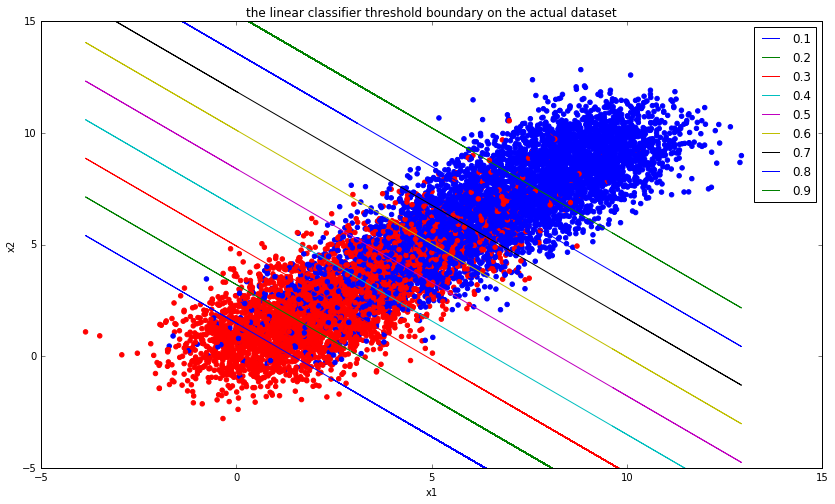

In [993]:
plt.figure(figsize = (14,8))
plt.scatter(x1_array,x2_array,color = color_map)
plt.plot(x1_array,x2_0p1, label = '0.1')
plt.plot(x1_array,x2_0p2, label = '0.2')
plt.plot(x1_array,x2_0p3, label = '0.3')
plt.plot(x1_array,x2_0p4, label = '0.4')
plt.plot(x1_array,x2_0p5, label = '0.5')
plt.plot(x1_array,x2_0p6, label = '0.6')
plt.plot(x1_array,x2_0p7, label = '0.7')
plt.plot(x1_array,x2_0p8, label = '0.8')
plt.plot(x1_array,x2_0p9, label = '0.9')
plt.legend()
plt.ylim(-5,15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('the linear classifier threshold boundary on the actual dataset')

Note that changing the threshold is graphically moving up and down the boundary line in parallel. The parallelism is observed because the slope, which is the coefficients of x1 and x2 doesn't change when we change the threshold. And the boundary moves linearly (i.e. the spacing is equal). This is because we are dealing with linear regression.

Now the problem with using linear regression to perform binary classification is that the y-value output does not make intuitive sense, which makes it difficult to interpret the result. We noticed before that y-value can continuously range from -infinity to infinity, while what we want is a binary 0 and 1. We can accommodate our need by performing thresholding. 

But another way to do it is to fit a logistic regression where the output itself can range from 0 to 1. we can interpret the output naturally as probability of binary classification, i.e. what is the probability of being in class 1.
The input of logistic regression is the "log-odd" of linear combination of the regressor (the x-values and its coefficients). The classification is then a binary outcome (i.e. the expected value) of bernoulli trials with the resulting probability generated from the logistic regression.

The fitting of logistic regression is done using maximum likelihood estimation, this doesn't have a closed form solution, but instead finds a local maximum of the likelihood function.

Text(0, 0.5, 'y')

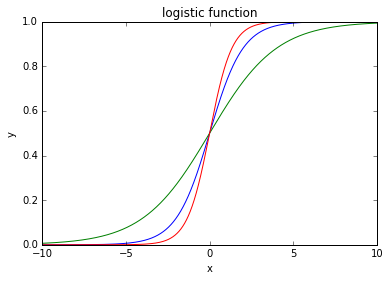

In [994]:
temp1_array = np.linspace(-100,100,10000)
temp2_array = np.linspace(-10,10,10000)
def logistic_func(x,b=1):
    """arg x array of floating numbers.
    return a logistic function of x"""
    return 1/(1+np.exp(-b*x))
plt.plot(temp2_array,logistic_func(temp2_array))
plt.plot(temp2_array,logistic_func(temp2_array,0.5))
plt.plot(temp2_array,logistic_func(temp2_array,1.5))
plt.title('logistic function')
plt.xlabel('x')
plt.ylabel('y')

In our example here, we will simply use logistic regression implementation of sklearn. Note that unlike linear regression, we have to use solver (which is an algorithm to find the maximum likelihood) because we don't have closed form solution for the maximum likelihood estimation. Read more [here](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions) about how each solver work.

In [995]:
from sklearn.linear_model import LogisticRegression

In [996]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(XY_dataframe[['x1','x2']],XY_dataframe['y'])

# create boundary for logistic regression

First we arrange a logistic function to have x2 on one side.

$z = \frac{1}{1+ e^{(-(intercept + \beta_1*x1 + \beta_2*x2))}}$

$e^{-(intercept + \beta_1*x1 + \beta_2*x2)} = \frac{1-z}{z} $

$-intercept - \beta_1*x1 - \beta_2*x2 = ln(\frac{1-z}{z}) $

x2 = $ \frac{ln(\frac{1-z}{z}) + intercept + \beta_1*x1}{\beta_2} $

In [997]:
z= 0.1
x2_logit_0p1 = (np.log((1 - z)/z) + clf.intercept_[0] + clf.coef_[0][0]*x1_array)/-clf.coef_[0][1]
z= 0.2
x2_logit_0p2 = (np.log((1 - z)/z) + clf.intercept_[0] + clf.coef_[0][0]*x1_array)/-clf.coef_[0][1]
z= 0.3
x2_logit_0p3 = (np.log((1 - z)/z) + clf.intercept_[0] + clf.coef_[0][0]*x1_array)/-clf.coef_[0][1]

z= 0.4
x2_logit_0p4 = (np.log((1 - z)/z) + clf.intercept_[0] + clf.coef_[0][0]*x1_array)/-clf.coef_[0][1]
z= 0.5
x2_logit_0p5 = (np.log((1 - z)/z) + clf.intercept_[0] + clf.coef_[0][0]*x1_array)/-clf.coef_[0][1]
z= 0.6
x2_logit_0p6 = (np.log((1 - z)/z) + clf.intercept_[0] + clf.coef_[0][0]*x1_array)/-clf.coef_[0][1]

z= 0.7
x2_logit_0p7 = (np.log((1 - z)/z) + clf.intercept_[0] + clf.coef_[0][0]*x1_array)/-clf.coef_[0][1]
z= 0.8
x2_logit_0p8 = (np.log((1 - z)/z) + clf.intercept_[0] + clf.coef_[0][0]*x1_array)/-clf.coef_[0][1]
z= 0.9
x2_logit_0p9 = (np.log((1 - z)/z) + clf.intercept_[0] + clf.coef_[0][0]*x1_array)/-clf.coef_[0][1]

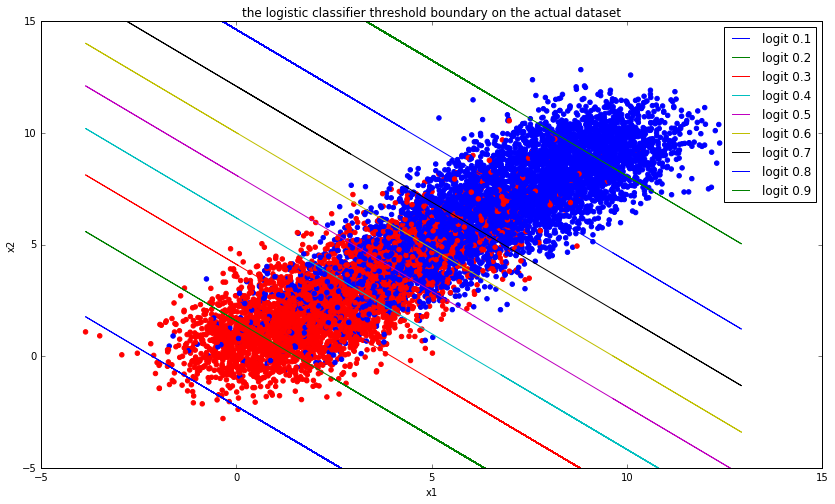

In [998]:
plt.figure(figsize=(14,8))
plt.scatter(x1_array,x2_array,color = color_map)
plt.plot(x1_array,x2_logit_0p1, label = 'logit 0.1')
plt.plot(x1_array,x2_logit_0p2, label = 'logit 0.2')
plt.plot(x1_array,x2_logit_0p3, label = 'logit 0.3')
plt.plot(x1_array,x2_logit_0p4, label = 'logit 0.4')
plt.plot(x1_array,x2_logit_0p5, label = 'logit 0.5')
plt.plot(x1_array,x2_logit_0p6, label = 'logit 0.6')
plt.plot(x1_array,x2_logit_0p7, label = 'logit 0.7')
plt.plot(x1_array,x2_logit_0p8, label = 'logit 0.8')
plt.plot(x1_array,x2_logit_0p9, label = 'logit 0.9')
plt.ylim(-5,15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('the logistic classifier threshold boundary on the actual dataset')
plt.legend()

Note that the boundary lines are non-linearly spaced out, unlike the linear regression.

Now let us plot the x1 value against y value and see how the linear regression and logistic regression plot on the same axis look like.

C:\Users\Virapat\Anaconda3_64bit\envs\AML_64\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 1.0, 'dataset projected to x1 and y axis and the fitted regression')

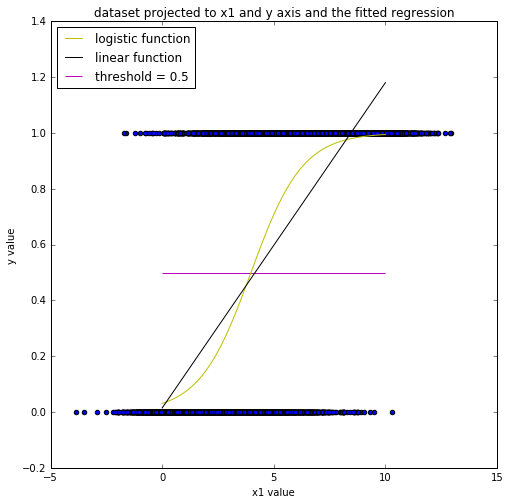

In [1000]:
plt.figure(figsize=(8,8))
x1_fit = np.linspace(0,10,100)
x2_fit = np.linspace(0,10,100)
fit_dataframe = pd.DataFrame({'x1':x1_fit,'x2':x2_fit})
#fit_dataframe.head()
y_logistic_array = clf.predict_proba(fit_dataframe[['x1','x2']])
#X_data = sm.add_constant(XY_dataframe[['x1','x2']])
y_linear_array = model.predict(sm.add_constant(fit_dataframe[['x1','x2']]))
plt.plot(list(x1_fit),list(1-y_logistic_array[:,0]),'y', label = 'logistic function')
plt.plot(list(x1_fit),list(y_linear_array),'k', label = 'linear function')
plt.scatter(x1_array,y_array)
plt.xlabel('x1 value')
plt.ylabel('y value')
plt.hlines(0.5,0,10,'m',label = 'threshold = 0.5')
plt.legend(loc = 'best')
#plt.plot(x1_outlier_array,y_logistic_array)
plt.title('dataset projected to x1 and y axis and the fitted regression')

This plot so far captures what we have been saying thus far about the range of output from linear regression and logistic regression. And this plot will be helpful again when we shows the impact of outliers on both kinds of regression.

# Impact of Outlier to linear classifier vs. logistic classifier

Because of the linearity and the least square in linear regression, the outlier is weighted more when cost function is computed. (think about if instead of least square, we used least 4th power, the outlier will be weighted even more).



In [892]:
# simulate a dataset with an outlier

x2_outlier_array = np.linspace(0,10,10000)
x2_outlier_array = x1_array + np.random.normal(0,1,10000)

x1_outlier_array = np.linspace(0,10,9980)
x1_outlier_array = x1_outlier_array + np.random.normal(0,1,9980)
x1_outlier_add = np.linspace(30,31,20)
x1_outlier_array = np.append(x1_outlier_array,x1_outlier_add)
print(x1_outlier_array.shape)
y_outlier_array = np.where((x1_outlier_array + x2_outlier_array + np.random.normal(0,0.5,10000) < 8) | 
                           (x1_outlier_array + x2_outlier_array + np.random.normal(0,0.5,10000) > 26), 
                   int(0),int(1))
color_outlier_map = np.where(y_outlier_array == 0,'red','blue')

(10000,)


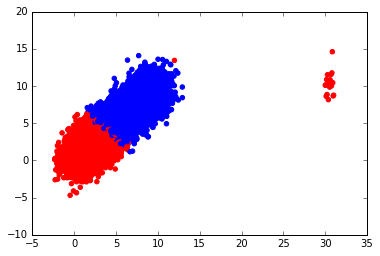

In [893]:
plt.scatter(x1_outlier_array,x2_outlier_array,color = color_outlier_map)

In [894]:
XY_outlier_dataframe = pd.DataFrame({'x1':x1_outlier_array,'x2':x2_outlier_array,'y':y_outlier_array})
X_outlier_data = sm.add_constant(XY_outlier_dataframe[['x1','x2']])
model_outlier = sm.OLS(y_outlier_array,X_outlier_data).fit()
model_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     9348.
Date:                Sun, 08 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:30:27   Log-Likelihood:                -1793.0
No. Observations:               10000   AIC:                             3592.
Df Residuals:                    9997   BIC:                             3614.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0423      0.006     -7.664      0.000      -0.053      -0.032
x1             0.0402      0.002     25.929      0.000       0.037       0.043
x2             0.0876      0.002     55.728      0.000       0.084       0.091
==============================================================================
Omnibus:                     1453.973   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8210.328
Skew:                          -0.575   Prob(JB):                         0.00
Kurtosis:                       7.287   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [895]:
xy_outlier_line = model_outlier.params.x1*x1_outlier_array + model_outlier.params.x2*x2_outlier_array + model_outlier.params.const
xy_outlier_classes = np.where(xy_outlier_line > 0.5, 1,0)
xycolor_outlier_map = np.where(xy_outlier_classes == 0,'green','m')

In [896]:
model_outlier.params.x1

0.04015481326653693

In [897]:
# generate a boundary line from the threshold (0.4-0.6)
x2_outlier_0p5 = (0.5 - model_outlier.params.const - model_outlier.params.x1*x1_outlier_array)/model_outlier.params.x2
x2_outlier_0p6 = (0.6 - model_outlier.params.const - model_outlier.params.x1*x1_outlier_array)/model_outlier.params.x2
x2_outlier_0p4 = (0.4 - model_outlier.params.const - model_outlier.params.x1*x1_outlier_array)/model_outlier.params.x2

Text(0.5, 1.0, 'the linear classifier with outlier boundary on the actual dataset')

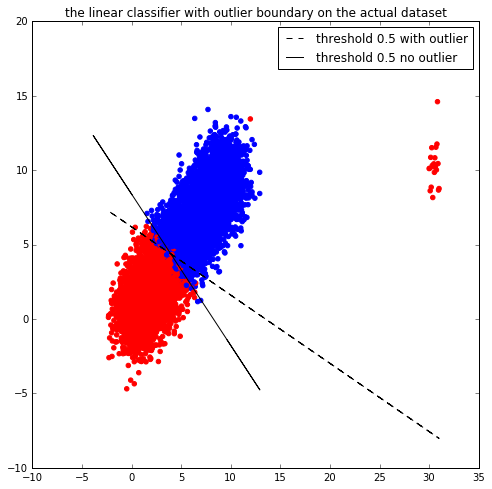

In [1009]:
#plt.scatter(x1_array,x2_array,color = xycolor_outlier_map)
plt.figure(figsize=(8,8))
plt.scatter(x1_outlier_array,x2_outlier_array,color = color_outlier_map)
plt.plot(x1_outlier_array,x2_outlier_0p5, 'k--', label = 'threshold 0.5 with outlier')
plt.plot(x1_array,x2_0p5,'k', label = 'threshold 0.5 no outlier')
#plt.plot(x1_array,x2_outlier_0p6, 'r', label = '0.6')
#plt.plot(x1_array,x2_outlier_0p4, 'b', label = '0.4')
plt.legend(loc='best')
plt.title('the linear classifier with outlier boundary on the actual dataset')

## Outlier biases linear regression. Let's see if the same outlier can bias the logistic regression to the same extent

In [899]:
clf_outlier = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(XY_outlier_dataframe[['x1','x2']],y_outlier_array)

In [900]:
z= 0.5
x2_logit_outlier_0p5 = (np.log((1 - z)/z) + clf_outlier.intercept_[0] + clf_outlier.coef_[0][0]*x1_outlier_array)/-clf_outlier.coef_[0][1]

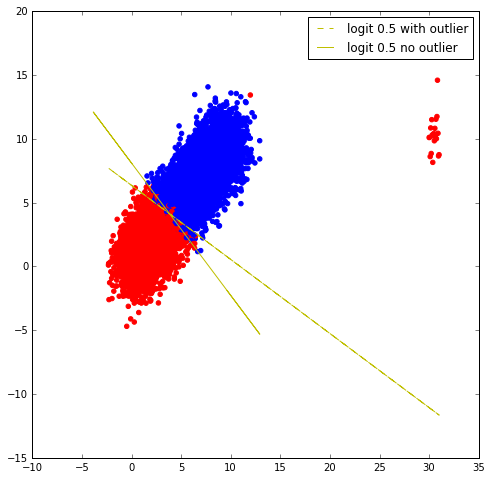

In [1010]:
plt.figure(figsize=(8,8))
plt.scatter(x1_outlier_array,x2_outlier_array,color = color_outlier_map)
plt.plot(x1_outlier_array,x2_logit_outlier_0p5, 'y--', label = 'logit 0.5 with outlier')
plt.plot(x1_array,x2_logit_0p5,'y', label = 'logit 0.5 no outlier')
plt.legend(loc = 'best')

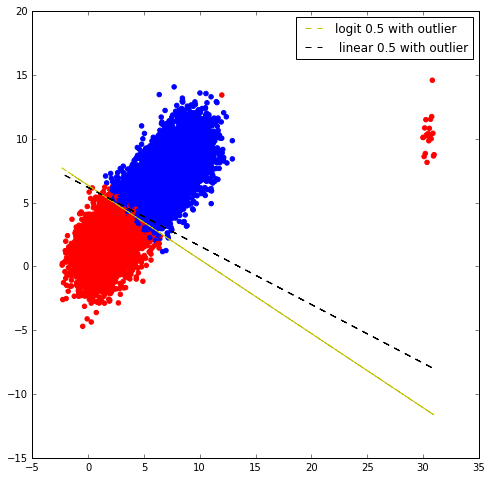

In [1011]:
plt.figure(figsize=(8,8))
plt.scatter(x1_outlier_array,x2_outlier_array,color = color_outlier_map)
plt.plot(x1_outlier_array,x2_logit_outlier_0p5, 'y--', label = 'logit 0.5 with outlier')
plt.plot(x1_outlier_array,x2_outlier_0p5, 'k--', label = ' linear 0.5 with outlier')
plt.legend(loc = 'best')

What we see here is that the boundary moves further towards the outlier in case of linear regression. The explanation is stated below.

C:\Users\Virapat\Anaconda3_64bit\envs\AML_64\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


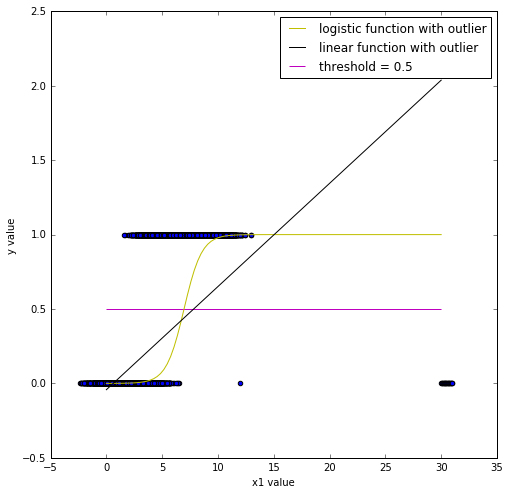

In [1013]:
x1_fit = np.linspace(0,30,100)
x2_fit = np.linspace(0,10,100)
fit_dataframe = pd.DataFrame({'x1':x1_fit,'x2':x2_fit})
#fit_dataframe.head()
y_logistic_array = clf_outlier.predict_proba(fit_dataframe[['x1','x2']])
#X_data = sm.add_constant(XY_dataframe[['x1','x2']])
y_linear_array = model_outlier.predict(sm.add_constant(fit_dataframe[['x1','x2']]))
plt.figure(figsize=(8,8))
plt.plot(list(x1_fit),list(1-y_logistic_array[:,0]),'y', label = 'logistic function with outlier')
plt.plot(list(x1_fit),list(y_linear_array),'k', label = 'linear function with outlier')
plt.scatter(x1_outlier_array, y_outlier_array)
plt.xlabel('x1 value')
plt.ylabel('y value')
plt.hlines(0.5,0,30,'m',label = 'threshold = 0.5')
plt.legend(loc = 'best')
#plt.plot(x1_outlier_array,y_logistic_array)

### You can see that the boundary of linear classifier moves to the outlier more than the boundary of the logistic regression. Why is that?

This is because the boundary of linear regression moves linearly throughout the range of x. On the other hand, the boundary of logistic regression behaves linearly only around the boundary of two classes, and saturates quickly at distant values of x (where the outlier is located). 

The outliers values fall at the saturated region of logistic regression, and doesn't really affect the class boundary.